In [15]:

# Required packages
using Polynomials
using Plots
#using PyPlot as backend
pyplot() 
#default(show = true)
using LaTeXStrings;
# Linewidths and styles
LW1 = 1.5
LW2 = 2.5
LS1 = :solid
LS2 = :dot
LS3 = :dashdot
LS4 = :dash;

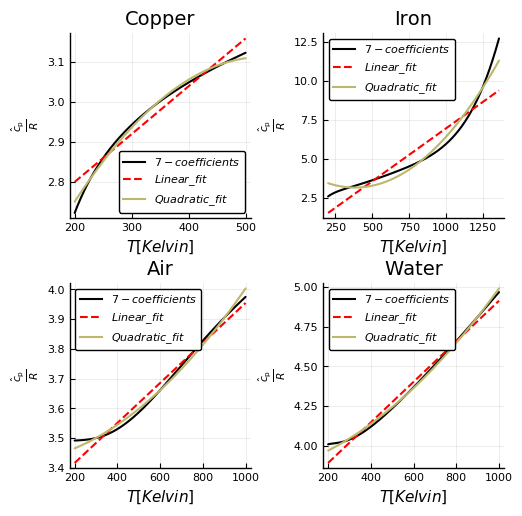

Linear fitting for Copper = Poly(2.559380892459937 + 0.0011982506064166993*x)
Quadratic fitting for Copper = Poly(2.180095589906275 + 0.003506973869188881*x - 3.2981760896745546e-6*x^2)

Linear fitting for Iron = Poly(0.19724545575725203 + 0.00676358006431966*x)
Quadratic fitting for Iron = Poly(4.407395605263029 - 0.0064858434375006735*x + 8.504122915160675e-6*x^2)

Linear fitting for Air = Poly(3.2822556593357177 + 0.0006721070788120142*x)
Quadratic fitting for Air = Poly(3.422877370340307 + 0.00012182906764467854*x + 4.585650093061106e-7*x^2)

Linear fitting for Water = Poly(3.6394816337401976 + 0.0012723320470041624*x)
Quadratic fitting for Water = Poly(3.861924085945121 + 0.00040187478031285565*x + 7.253810555760839e-7*x^2)



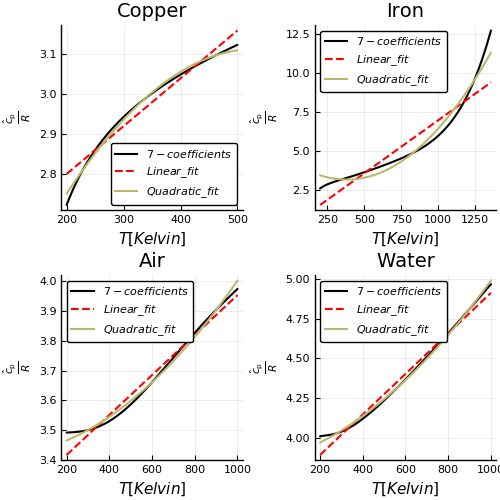

In [45]:
#NASA Lewis 7-coefficients format

coff_copper = [-2.455775109e+04, 1.648069205e+02, 2.080947143e+00, 
   2.639078305e-03,-2.714101362e-06, 1.402864982e-09, -9.724321640e-14]

coff_iron = [1.35e+4,-7.8e+2,9.44,-2.521e-2,5.35e-5,-5.0e-8,1.9e-11]

coff_air = [1.009950160e+04,-1.968275610e+02, 5.009155110e+00,-5.761013730e-03, 1.066859930e-05,
-7.940297970e-09, 2.185231910e-12]

coff_water = [-3.947960830e+04, 5.755731020e+02, 9.317826530e-01, 7.222712860e-03,-7.342557370e-06,
4.955043490e-09,-1.336933246e-12 ]

#Temperature range with 10000 data points
temp_range_Cu = range(200.,stop=500.,length=10000)
temp_range_Fe = range(200.,stop=1358.,length=10000)
temp_range_air = range(200.,stop=1000.,length=10000)
temp_range_water = range(200.,stop=1000.,length=10000)

a = [coff_copper, coff_iron, coff_air, coff_water]
T = [temp_range_Cu, temp_range_Fe, temp_range_air, temp_range_water]

# Stores plot of type = Plots.Plot{Plots.PyPlotBackend}
some_value = [1,2,3]
other_value= [1,2,3]
random_value=plot(some_value,other_value,show=false)
plot_storing_array = (Array{Plots.Plot{Plots.PyPlotBackend}}(undef,3))
plot_storing_array = [random_value,random_value,random_value,random_value,random_value]

#chpbyR = ["chpbyR_NASA_Cu", "chpbyR_NASA_Fe", "chpbyR_NASA_air", "chpbyR_NASA_water"]
names = ["Copper", "Iron", "Air", "Water"]
for i = 1:length(a)
    #chp/R (molar specific heat capacity)
    #given in NASA Lewis coefficeints form
    chpbyR_NASA=@. a[i][1]*T[i]^(-2)+a[i][2]*T[i]^(-1)+a[i][3]+a[i][4]*T[i]+a[i][5]*T[i]^(2)+a[i][6]*T[i]^(3)+a[i][7]*T[i]^(4);
    linear_fit = polyfit(T[i], chpbyR_NASA, 1)
    quadratic_fit = polyfit(T[i], chpbyR_NASA, 2)
    print("Linear fitting for $(names[i]) = $linear_fit\n")
    print("Quadratic fitting for $(names[i]) = $quadratic_fit\n\n");
    linear_fit_coff = coeffs(linear_fit::Poly)
    quadratic_fit_coff = coeffs(quadratic_fit::Poly)
    chpbyR_linear_fit = @. linear_fit_coff[1] + linear_fit_coff[2]*T[i]
    chpbyR_quadratic_fit = @. quadratic_fit_coff[1] + quadratic_fit_coff[2]*T[i]+ quadratic_fit_coff[3]*T[i]^2 
    plot(T[i], chpbyR_NASA,lc=:black ,lw=LW1,ls=LS1,label=L"$7-coefficients$",xlabel=L"$T\ [Kelvin]$",ylabel=L"$\frac{\tilde c_\mathrm{p}}{R}$",show=false);
    plot!(T[i], chpbyR_linear_fit,lc=:red ,lw=LW1,ls=LS4,label=L"$Linear\_fit$",show=false);
    plot_storing_array[i]=plot!(T[i], chpbyR_quadratic_fit,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$Quadratic\_fit$", reuse=false, show=false);
    title!("$(names[i])")
end
plot(plot_storing_array[1],plot_storing_array[2],plot_storing_array[3],plot_storing_array[4],layout=grid(2,2),size = (500, 500))


In [25]:
using Polynomials
#For alpha iron from NASA Lewis 7-coefficients format
#array of 7-coefficients
a=[1.35e+4,-7.8e+2,9.44,-2.521e-2,5.35e-5,-5.0e-8,1.9e-11]
#coff_copper=[-2.455775109e+04, 1.648069205e+02, 2.080947143e+00, 
   #2.639078305e-03,-2.714101362e-06, 1.402864982e-09, -9.724321640e-14]
#coff_air=
#coff_water

#Temperature range 200 K- 500 K with 10000 data points
T=range(200.,stop=500.,length=10000)

#chp/R (molar specific heat capacity)
#given in NASA Lewis coefficeints form
chpbyRNASA=@. a[1]*T^(-2)+a[2]*T^(-1)+a[3]+
              a[4]*T+a[5]*T^(2)+a[6]*T^(3)+a[7]*T^(4);
#fitting for polynomial degree of order-1 
#gives output in format a_(n-1)*x^(n-1)+a_(n-2)*x^(n-2)+.....+a_0*x^0
order1 = polyfit(T, chpbyRNASA, 1)
aFe=coeffs(order1::Poly)
#aFe, bFe = Poly(order1)
print("coeff or iron= $order1=$(a[5]) ")
#print(bFe)
#cpbyROrder1=@. aFe+bFe*T


coeff or iron= Poly(2.0647066498368774 + 0.0031820342112807497*x)=5.35e-5 

In [48]:
Tr0, Ts0, TFe0, Tac0, Tad0, Tah0 = 94., 81., 70., 20.85, 31.31, 39.12 
initial_value_temp = [Tr0, Ts0, TFe0, Tac0, Tad0, Tah0]
@. initial_value_temp+100

6-element Array{Float64,1}:
 194.0 
 181.0 
 170.0 
 120.85
 131.31
 139.12

In [64]:
# Choosing colors
# Note: This "c_usn" color dictionary is produce 
#       by Prof. Bernt Lie at USN-Campus Porsgrunn
#       and used upon request.
# USN colors
# https://min.usn.no/ansatte/tjenester/kommunikasjonstjenester/design/farger-article194686-13966.html
# Colors are (PowerPoint) "purple","teal","turquoise", "red", "gold", "teal","light green", "aqua",
#  "gray-50%", "gray-25%", "gray-25%"
c_usn = Dict("purple_1"=>colorant"#4646A5", "teal_1"=>colorant"#3BAFA2",
    "turquoise_2"=>colorant"#27B2DO","red_2"=>colorant"#D64349",
    "gold_2"=>colorant"#FFD240",
    "teal_3"=>colorant"#7E9492","green_light_3"=>colorant"#A6B6B3",
    "aqua_3"=>colorant"#C8D7D7","gray_50_3"=>colorant"#8C9696",
    "gray_25_3"=>colorant"#AFB6B3","gray_25_light_3"=>colorant"#D2D7D7");
[v for (k,v) in c_usn]


MethodError: MethodError: no method matching Array{Plots.Plot{Plots.PyPlotBackend},N} where N(::Type{UndefInitializer}, ::Int64)
Closest candidates are:
  Array{Plots.Plot{Plots.PyPlotBackend},N} where N(!Matched::UndefInitializer, ::Int64) where T at boot.jl:408
  Array{Plots.Plot{Plots.PyPlotBackend},N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64) where T at boot.jl:409
  Array{Plots.Plot{Plots.PyPlotBackend},N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:410
  ...

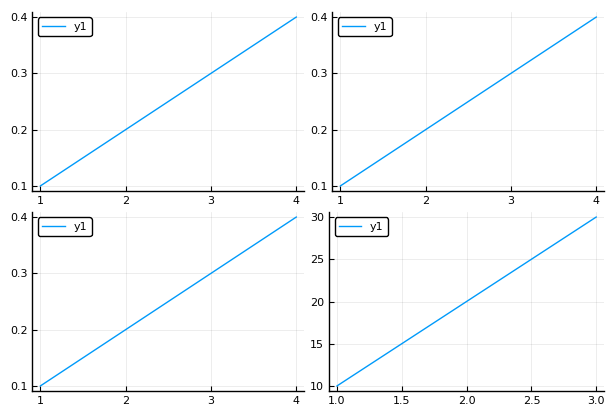

C:\Users\pande\.julia\conda\3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


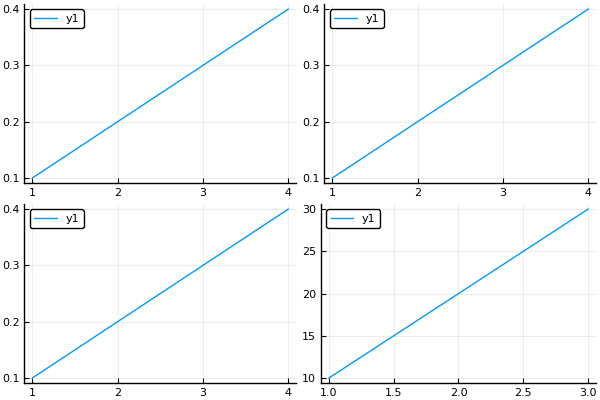

In [2]:
some_value = [1,2,3]
other_value= [10,20,30]
random_value=plot(some_value,other_value)
#plot_storing_array=(Array{Plots.Plot{Plots.PyPlotBackend}}(undef,3))
plot_storing_array = [random_value,random_value,random_value]
for i = 1:3
   plot_storing_array[i]=plot([1,2,3,4],[0.1,0.2,0.3,0.4])
end
plot(plot_storing_array[1],plot_storing_array[2],plot_storing_array[3],random_value,layout=grid(2,2))
    
